In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
!pip install openpyxl



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


import file

In [72]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [73]:
data.shape

(5110, 12)

checking if there are wrong data types

In [74]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

checking the typos of categorical and binary features

In [75]:
print(data['gender'].value_counts())
print(data['ever_married'].value_counts())
print(data['work_type'].value_counts())
print(data['Residence_type'].value_counts())
print(data['smoking_status'].value_counts())
print(data['stroke'].value_counts())


gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
stroke
0    4861
1     249
Name: count, dtype: int64


**droping rare features**

droping the rows that contain this feature

In [76]:
data=data[data['gender']!='Other']

**droping unnecessary columns** 

In [77]:
data=data.drop(['id'],axis=1)

In [78]:
data.shape

(5109, 11)

**checking for duplicates and NANs**

In [79]:
data.duplicated().sum()

np.int64(0)

In [80]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**we have to separate between features and target**

In [81]:
x=data['stroke']
data=data.drop('stroke',axis=1)

**handling outliers of numerical features**

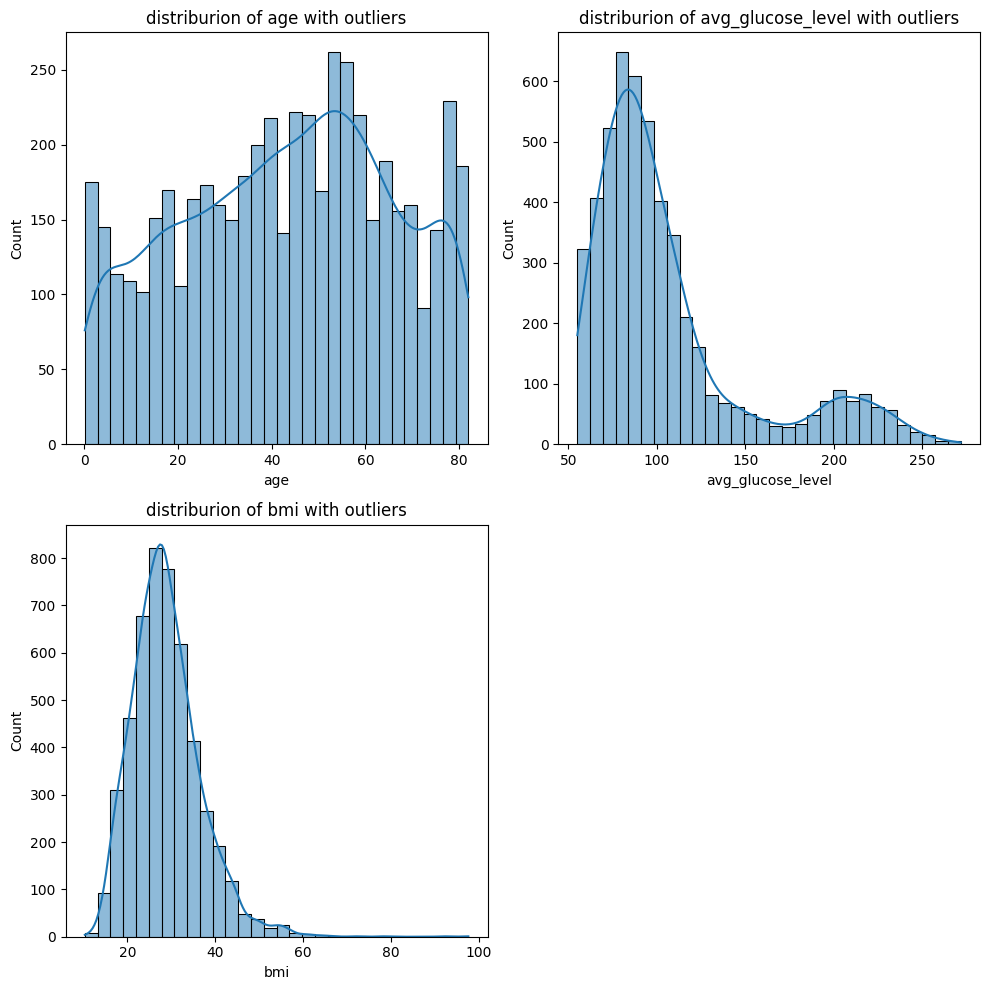

In [82]:
features=['age','avg_glucose_level','bmi']
plt.figure(figsize=(2*5,2*5))
for i,feature in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.histplot(data[feature],kde=True,bins=30)
    plt.title(f'distriburion of {feature} with outliers')
plt.tight_layout()
plt.show()

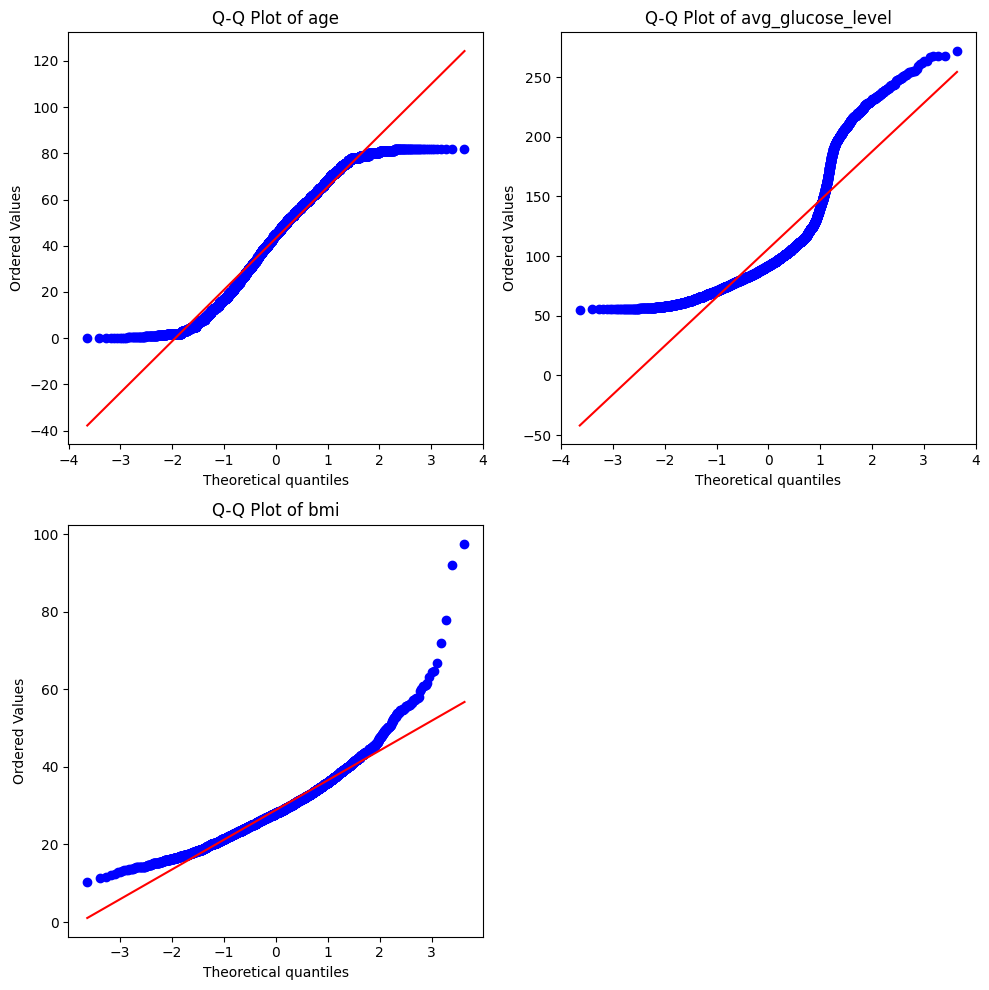

In [83]:
from scipy.stats import probplot,normaltest,boxcox
plt.figure(figsize=(2*5,2*5))

for i,feature in enumerate(features):
    plt.subplot(2,2,i+1)
    clean_data = data[feature].dropna()  # Remove NaNs
    probplot(clean_data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {feature}')
plt.tight_layout()
plt.show()


**statistical test for normality**

In [84]:

for col in ['age', 'avg_glucose_level', 'bmi']:
    stat, p = normaltest(data[col].dropna()) #drop NANs 
    print(f"{col}: p = {p} => {'Normal' if p > 0.05 else 'Not normal'}")


age: p = 6.466817238449553e-244 => Not normal
avg_glucose_level: p = 2.1840552435286905e-289 => Not normal
bmi: p = 2.2866990701300037e-222 => Not normal


**testing available transformations to lead the data distribution to be normal**


first: log transform

In [85]:
for col in ['age', 'avg_glucose_level', 'bmi']:
    data_log=np.log(data[col])
    stat,p=normaltest(data_log.dropna())
    print(f"{col}: p = {p} => {'Normal' if p > 0.05 else 'Not normal'}")


age: p = 0.0 => Not normal
avg_glucose_level: p = 1.673020316065845e-110 => Not normal
bmi: p = 0.007865024027584634 => Not normal


still not normal

second: square root transform

In [86]:
for col in ['age', 'avg_glucose_level', 'bmi']:
    data_root=np.sqrt(data[col])
    stat,p=normaltest(data_root.dropna())
    print(f"{col}: p = {p} => {'Normal' if p > 0.05 else 'Not normal'}")


age: p = 1.7461244139884572e-91 => Not normal
avg_glucose_level: p = 9.110756926536175e-198 => Not normal
bmi: p = 4.830527764604953e-57 => Not normal


failed to be normal


third: boxcox transform

In [87]:

for col in ['age', 'avg_glucose_level', 'bmi']:
    col_data = data[col]
    transformed, lam = boxcox(col_data.dropna())  

    stat, p = normaltest(transformed)      #transformed is a numpy array so we can't type transformed.dropna()---> .dropna() is a function in pandas
    print(f"{col}: p = {p:.4f} => {'Normal' if p > 0.05 else 'Not normal'}")


age: p = 0.0000 => Not normal
avg_glucose_level: p = 0.0000 => Not normal
bmi: p = 0.0080 => Not normal


failed agian to normalize the data

**now handling outliers of the non normal distributed data**

visualizing the boxplot of the age , avg_glucose_level and bmi

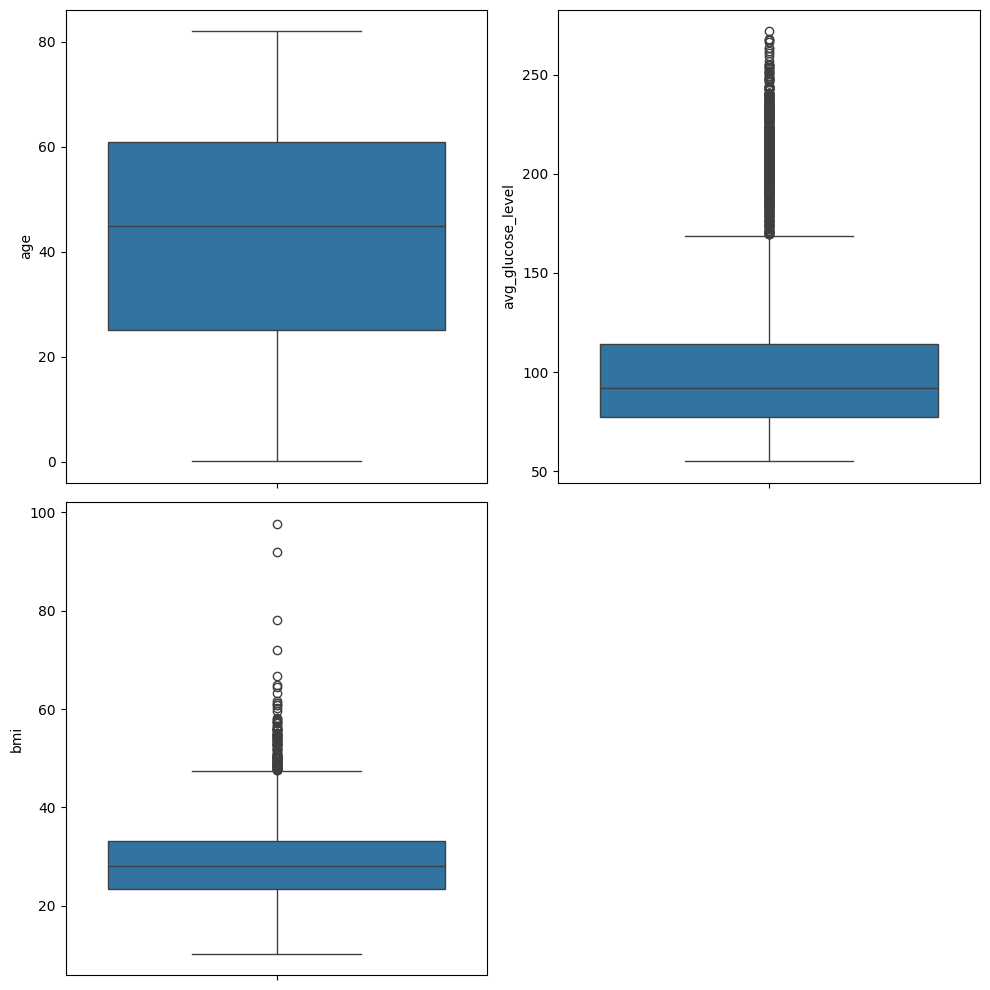

In [88]:
features=['age','avg_glucose_level','bmi']
plt.figure(figsize=(2*5,2*5))
for i,feature in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.boxplot(data[feature])
plt.tight_layout()
plt.show()

as we can see age hasn't outliers

In [89]:
for feature in ['bmi','avg_glucose_level']:    
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 2 * IQR       #extending the range fo reduce outliers
    upper_bound = Q3 + 2 * IQR    
    outliers_df=data[(data[feature]>upper_bound)|(data[feature]<lower_bound)]
outliers_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown
14,Female,79.0,0,1,Yes,Private,Urban,214.09,28.2,never smoked
16,Male,64.0,0,1,Yes,Private,Urban,191.61,37.5,smokes
...,...,...,...,...,...,...,...,...,...,...
5035,Female,78.0,0,0,Yes,Private,Urban,203.36,28.7,formerly smoked
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes
5061,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked
5062,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked


**returning a cleaned data frame**

In [90]:
for feature in ['bmi','avg_glucose_level']:    
    df_cleaned=data[(data[feature]<=upper_bound)&(data[feature]>=lower_bound)]
df_cleaned

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [91]:
df_cleaned.shape

(4566, 10)

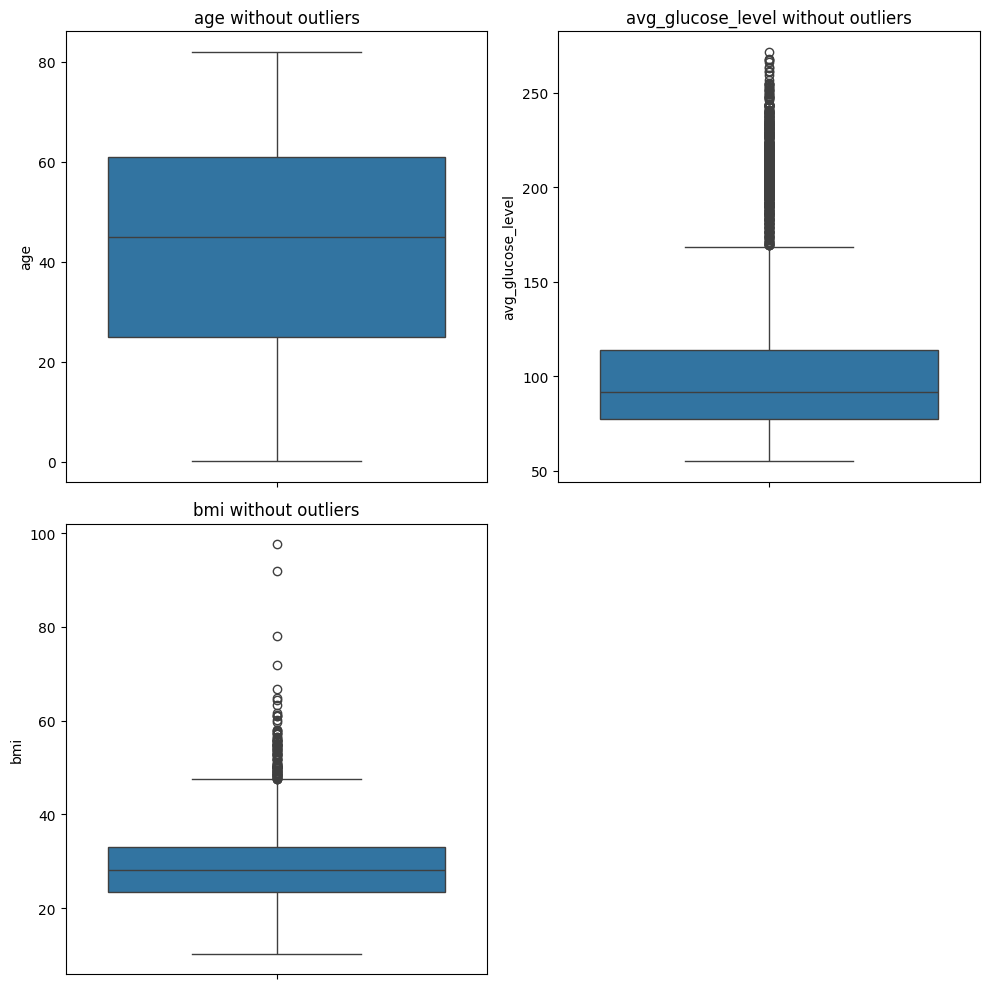

In [92]:
features=['age','avg_glucose_level','bmi']
plt.figure(figsize=(2*5,2*5))
for i,feature in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.boxplot(data[feature])
    plt.title(f'{feature} without outliers')
plt.tight_layout()
plt.show()

**encoding the categories for an upcoming step(missing values)
KNN needs all the data to be numerical**

In [93]:
data_encoded=pd.get_dummies(df_cleaned,columns=['gender','ever_married','work_type','Residence_type','smoking_status'],drop_first=False)
#drop_first=true will cause missing a dimension so the distance will be wrong   
data_encoded[['ever_married_No','gender_Male','gender_Female'	,'Residence_type_Rural',	'ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children',	'Residence_type_Urban',	'smoking_status_formerly smoked'	,'smoking_status_never smoked'	,'smoking_status_smokes','smoking_status_Unknown']]=data_encoded[['gender_Male','gender_Female'	,'Residence_type_Rural',	'ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children',	'Residence_type_Urban',	'smoking_status_formerly smoked'	,'smoking_status_never smoked'	,'smoking_status_smokes','smoking_status_Unknown','ever_married_No']].astype(int)  
data_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,80.0,0,1,105.92,32.5,1,0,1,0,False,1,0,0,0,1,0,0,1,0,0
3,49.0,0,0,171.23,34.4,0,1,0,0,False,1,0,0,1,1,0,0,0,1,0
4,79.0,1,0,174.12,24.0,1,1,0,0,False,0,1,0,0,1,0,0,1,0,0
5,81.0,0,0,186.21,29.0,0,0,1,0,False,1,0,0,1,1,1,0,0,0,0
6,74.0,1,1,70.09,27.4,1,0,1,0,False,1,0,0,0,1,0,0,1,0,0


**data has to be scaled before KNN for features equality**

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(data_encoded),columns=data_encoded.columns)
#output of minmaxscaler is numpy array

**handling missing values so we can after that check the features redundancy that requires no missing values**

In [95]:
from sklearn.impute import KNNImputer

In [96]:
imputer = KNNImputer(n_neighbors=5)  
data_imputed = imputer.fit_transform(df_scaled)
data_imputed = pd.DataFrame(data_imputed, columns=df_scaled.columns)
data_imputed.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.975586,0.0,1.0,0.383686,0.254296,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.597168,0.0,0.0,0.876964,0.276060,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.963379,1.0,0.0,0.898792,0.156930,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.987793,0.0,0.0,0.990106,0.214204,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.902344,1.0,1.0,0.113066,0.195876,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [97]:
original_scale=pd.DataFrame(scaler.inverse_transform(data_imputed),columns=df_scaled.columns)
original_scale

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,80.0,0.0,1.0,105.92,32.50,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,49.0,0.0,0.0,171.23,34.40,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,79.0,1.0,0.0,174.12,24.00,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,81.0,0.0,0.0,186.21,29.00,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,74.0,1.0,1.0,70.09,27.40,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,80.0,1.0,0.0,83.75,26.26,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4562,81.0,0.0,0.0,125.20,40.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4563,35.0,0.0,0.0,82.99,30.60,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4564,51.0,0.0,0.0,166.29,25.60,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [98]:
data_imputed.shape

(4566, 20)

**checking for redundant features** 

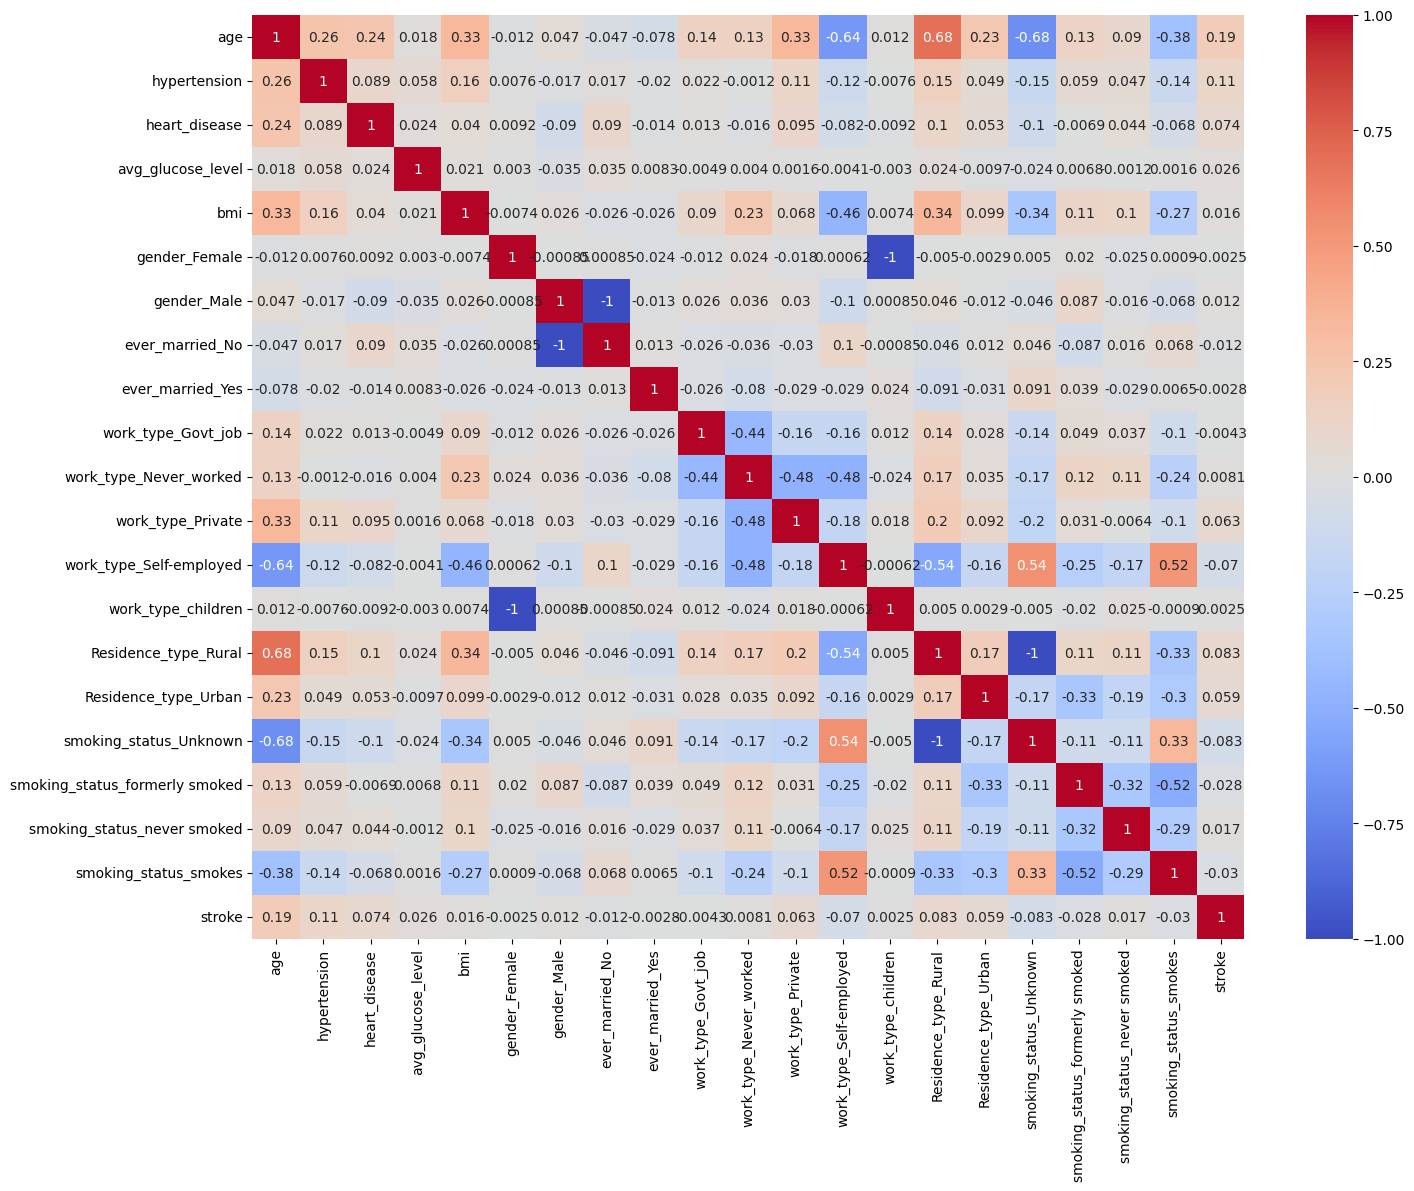

In [99]:
plt.figure(figsize=(16,12))
dataf=pd.merge(original_scale,x,how='inner',right_index=True,left_index=True)
correlation_matrix = dataf.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


**drop one from each two high correlated features**

In [100]:
dataf=dataf.drop(['ever_married_No','work_type_children','smoking_status_Unknown'],axis=1)

In [101]:
X=dataf.iloc[:,:-1]
Y=dataf.iloc[:,-1]

In [102]:
X.shape

(4565, 17)

checking for variance

In [103]:
from sklearn.feature_selection import VarianceThreshold


In [104]:
selector=VarianceThreshold(threshold=(0.01))
data_selected=pd.DataFrame(selector.fit_transform(X))
data_selected.shape

(4565, 16)

In [105]:
selected_features=X.columns[selector.get_support()]
selected_features

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [106]:
final_data_frame=pd.DataFrame(X,columns=selected_features)
final_data_frame.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,80.0,0.0,1.0,105.92,32.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,49.0,0.0,0.0,171.23,34.4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,79.0,1.0,0.0,174.12,24.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,81.0,0.0,0.0,186.21,29.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,74.0,1.0,1.0,70.09,27.4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [107]:
Y.value_counts(normalize=True)

stroke
0    0.945455
1    0.054545
Name: proportion, dtype: float64

In [108]:
Y.shape

(4565,)

In [109]:
from imblearn.pipeline import Pipeline 
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer,StandardScaler

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=41, stratify=Y)

In [111]:
y_train.shape

(3652,)

## data preprocessing

In [112]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA


In [160]:
def make_svm_pipe(C=1,kernel='linear',degree=3,class_weight=None,gamma='scale',use_smote=False,use_pca=False,n_components=2):
    model=SVC(C=C,kernel=kernel,degree=degree,class_weight=class_weight,gamma=gamma,probability=True)
    steps=[]
    if use_smote:
        steps.append(('smote',SMOTE(random_state=42)))
    steps.append( ('transformer',PowerTransformer()),
        ('scaler',StandardScaler()))
    if use_pca:
        steps.append(('pca',PCA(n_components=n_components,random_state=42)))
    
    steps.append(('model',model))
    
    return Pipeline(steps)

pipe line must contain scaler because svm and pca are distance based method
and the transformer must be before the the scaling to reduce the skewness so the outliers don't disturb the model which is distance based 
and the order matters because the transformation function is nonlinear and the scaling is linear 

if I scaled first negative values could be there and box cox will not work

In [118]:
imbalanced_hard_pipe=make_svm_pipe(kernel='linear',class_weight='balanced',C=100)
hard_pipe=make_svm_pipe(kernel='linear',C=100,use_smote=True)
soft_pipe1=make_svm_pipe(kernel='linear',use_smote=True)
soft_pipe2=make_svm_pipe(kernel='linear',use_smote=True,C=5)
poly_pipe=make_svm_pipe(kernel='poly',use_smote=True,degree=3)
poly_pipe2=make_svm_pipe(kernel='poly',use_smote=True,degree=2)
rbf_pipe=make_svm_pipe(kernel='rbf',use_smote=True)
rbf_pipe2=make_svm_pipe(kernel='rbf',use_smote=True,gamma='auto')
sigmoid_pipe=make_svm_pipe(kernel='sigmoid',use_smote=True)


In [119]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_score,recall_score,f1_score

In [120]:
pipes = {
    "imbalanced hard": imbalanced_hard_pipe,
    "hard": hard_pipe,
    "soft1": soft_pipe1,
    "soft2": soft_pipe2,
    "poly1": poly_pipe,
    "poly2": poly_pipe2,
    "rbf1": rbf_pipe,
    "rbf2": rbf_pipe2,
    "sigmoid": sigmoid_pipe
}
y_test_pred={}
y_test_proba={}
y_train_pred={}
y_train_proba={}
models = {}
for name, pipe in pipes.items():
    models[name] = pipe.fit(X_train, y_train)
    y_test_pred[name]=pipe.predict(X_test)
    y_test_proba[name]=pipe.predict_proba(X_test)
    y_train_pred[name]=pipe.predict(X_train)
    y_train_proba[name]=pipe.predict_proba(X_train)

In [121]:
for name,prediction in y_test_pred.items():
    print(f'{name}\n{classification_report(y_test,prediction,target_names=['stroke','not stroke'])}')

imbalanced hard
              precision    recall  f1-score   support

      stroke       0.98      0.70      0.82       863
  not stroke       0.12      0.72      0.21        50

    accuracy                           0.70       913
   macro avg       0.55      0.71      0.51       913
weighted avg       0.93      0.70      0.78       913

hard
              precision    recall  f1-score   support

      stroke       0.98      0.70      0.81       863
  not stroke       0.12      0.74      0.21        50

    accuracy                           0.70       913
   macro avg       0.55      0.72      0.51       913
weighted avg       0.93      0.70      0.78       913

soft1
              precision    recall  f1-score   support

      stroke       0.98      0.69      0.81       863
  not stroke       0.12      0.74      0.21        50

    accuracy                           0.70       913
   macro avg       0.55      0.72      0.51       913
weighted avg       0.93      0.70      0.78    

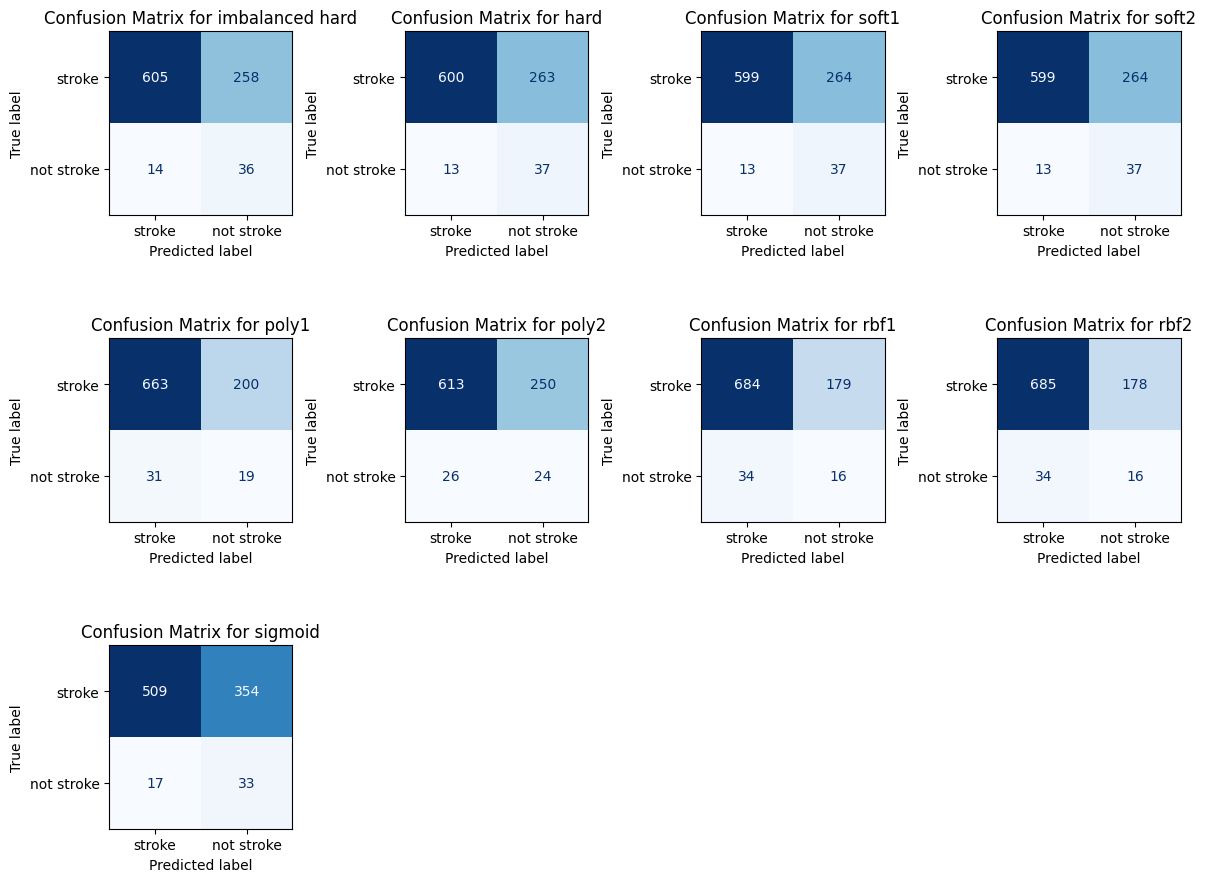

In [122]:
plt.figure(figsize=(4*3,4*3))
for i,(name,prediction) in enumerate(y_test_pred.items()):
    ax=plt.subplot(4,4,i+1)
    cm = confusion_matrix(y_test, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['stroke','not stroke'])
    disp.plot(cmap='Blues', ax=ax, colorbar=False)
    ax.set_title(f"Confusion Matrix for {name}")
plt.tight_layout()
plt.show()

In [123]:
from sklearn.metrics import roc_auc_score

In [124]:
y_test.shape

(913,)

In [129]:
test_result=[]
train_result=[]
for _,proba in y_test_proba.items():
    test_result.append({"test_roc_auc_score": roc_auc_score(y_test,proba[:,1],average='macro')})
for _,proba in y_train_proba.items():
    train_result.append({"train_roc_auc_score": roc_auc_score(y_train,proba[:,1],average='macro')})

test_result=pd.DataFrame(test_result,index=y_test_proba.keys())
train_result=pd.DataFrame(train_result,index=y_train_proba.keys())

result=pd.concat([test_result,train_result],axis=1).sort_values(by='test_roc_auc_score',ascending=False)
display(result)

,test_roc_auc_score,train_roc_auc_score
soft2,0.731101,0.757590
hard,0.731078,0.757588
soft1,0.731031,0.757593
imbalanced hard,0.727231,0.759359
sigmoid,0.682457,0.594331
poly2,0.599977,0.769409
rbf1,0.584844,0.868188
rbf2,0.584600,0.868715
poly1,0.554218,0.875348


as we can see best model is the soft one with C=5

also we can notice that the rbf kernel models have been overfitted on the training data same as the polynomial model with degree=3

also notice that the hard margin with smote tool of balancing is slightly better than the hard margin without imbalancing and just using class weight='balanced' to increase the minority weights 

In [140]:
test_result=[]
train_result=[]
for key in y_test_proba:
    proba=y_test_proba[key]
    prediction=y_test_pred[key]
    test_result.append({
        "test_roc_auc_score": roc_auc_score(y_test,proba[:,1],average='macro'),
        "Model": key,
        "Accuracy": accuracy_score(y_test, prediction),
        "Precision": precision_score(y_test, prediction, average='weighted'),
        "Recall": recall_score(y_test, prediction, average='weighted'),
        "F1 Score": f1_score(y_test, prediction, average='weighted')
        })
for key in y_train_proba:
    proba=y_train_proba[key]
    prediction=y_train_pred[key]
    train_result.append({
        "test_roc_auc_score": roc_auc_score(y_train,proba[:,1],average='macro'),
        "Model": key,
        "Accuracy": accuracy_score(y_train, prediction),
        "Precision": precision_score(y_train, prediction, average='weighted'),
        "Recall": recall_score(y_train, prediction, average='weighted'),
        "F1 Score": f1_score(y_train, prediction, average='weighted')
        })

In [141]:
test_result_df=pd.DataFrame(test_result).set_index("Model").sort_values(by="F1 Score",ascending=False)
train_result_df=pd.DataFrame(train_result).set_index("Model").sort_values(by="F1 Score",ascending=False)
display(test_result_df)

,test_roc_auc_score,Accuracy,Precision,Recall,F1 Score
Model,,,,,
rbf2,0.584600,0.767798,0.905054,0.767798,0.825749
rbf1,0.584844,0.766703,0.904969,0.766703,0.825042
poly1,0.554218,0.746988,0.907764,0.746988,0.812734
imbalanced hard,0.727231,0.702081,0.930563,0.702081,0.783213
hard,0.731078,0.697700,0.931944,0.697700,0.780063
poly2,0.599977,0.697700,0.911572,0.697700,0.779657
soft1,0.731031,0.696605,0.931889,0.696605,0.779269
soft2,0.731101,0.696605,0.931889,0.696605,0.779269
sigmoid,0.682457,0.593647,0.919356,0.593647,0.701035


It is prefered to not consider the accuracy as an evaluation metric with imbalanced data because it could be misleading

In [142]:
display(train_result_df)

,test_roc_auc_score,Accuracy,Precision,Recall,F1 Score
Model,,,,,
rbf2,0.868715,0.792716,0.943631,0.792716,0.846891
rbf1,0.868188,0.791895,0.943584,0.791895,0.846334
poly1,0.875348,0.776835,0.943512,0.776835,0.836125
poly2,0.769409,0.710296,0.931194,0.710296,0.789261
imbalanced hard,0.759359,0.697700,0.926943,0.697700,0.780185
hard,0.757588,0.687842,0.928002,0.687842,0.773066
soft1,0.757593,0.687842,0.928002,0.687842,0.773066
soft2,0.757590,0.687842,0.928002,0.687842,0.773066
sigmoid,0.594331,0.574480,0.911039,0.574480,0.686353


In [166]:
def plot_svm_decision_boundary(pipe, X, y, title="Decision Boundary"):
    # split pipeline into preprocessing and model
    steps_no_smote = [(name, step) for name, step in pipe.steps 
                      if name not in ["smote", "model"]]
    preproc = Pipeline(steps_no_smote)    
    model   = pipe[-1]    # the classifier

    # get 2D features (fit preprocessing, then transform)
    X_2d = preproc.fit_transform(X, y)

    # fit full pipeline (with model)
    pipe.fit(X_2d, y)

    # grid
    h = 0.02  
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)   # already in PCA space
    Z = Z.reshape(xx.shape)

    # plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.show()


In [156]:
pca_soft_pipe=make_svm_pipe(kernel='linear',use_smote=True,use_pca=True)
pca_poly_pipe=make_svm_pipe(kernel='poly',use_smote=True,degree=3,use_pca=True)
pca_rbf_pipe=make_svm_pipe(kernel='rbf',use_smote=True,gamma='auto',use_pca=True)

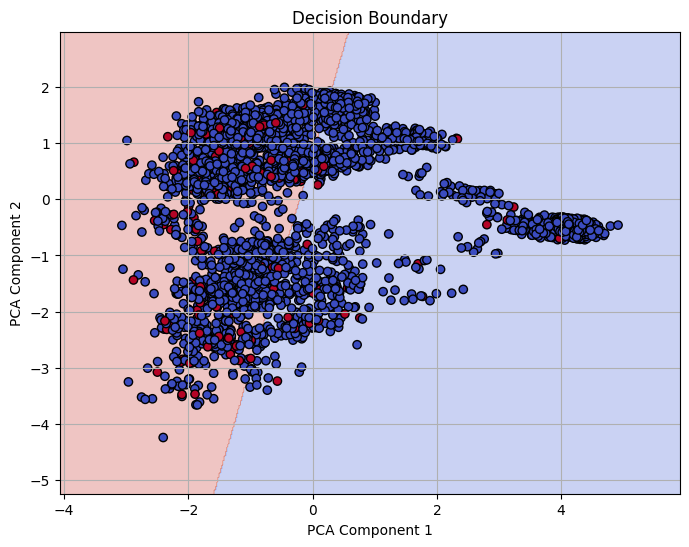

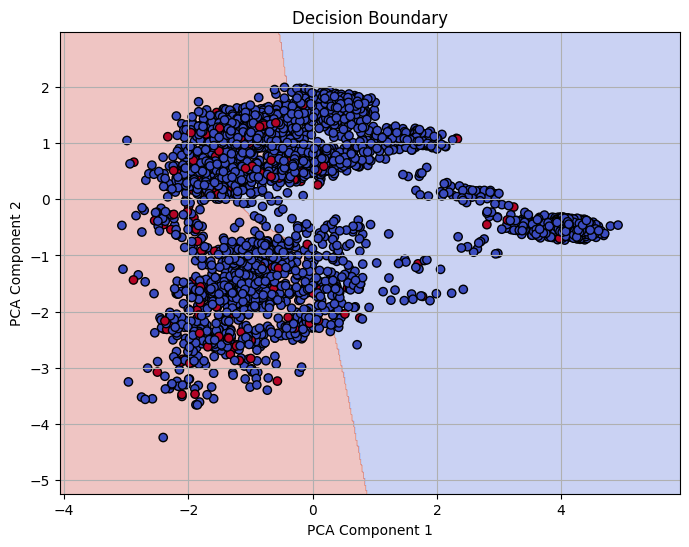

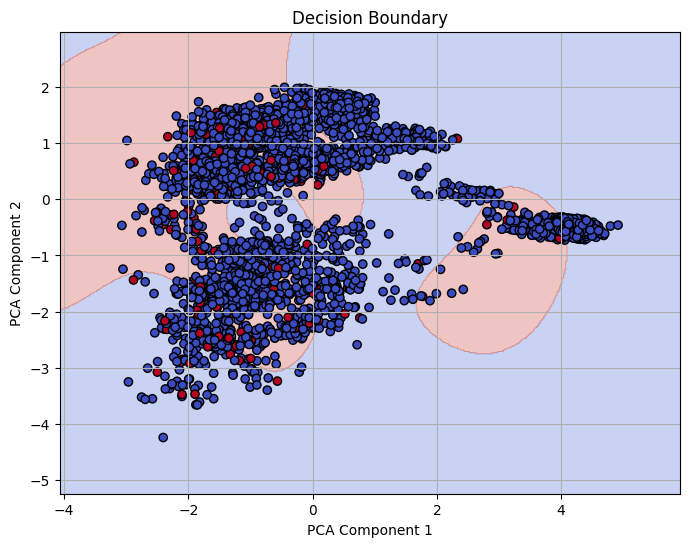

In [167]:
plot_svm_decision_boundary(pca_soft_pipe,X_train,y_train)
plot_svm_decision_boundary(pca_poly_pipe,X_train,y_train)
plot_svm_decision_boundary(pca_rbf_pipe,X_train,y_train)


from the graphs I think that the best model from these three models is the rbf model but don't forget that this is the trainig data and we said before that the rbf models have overfitted